# Laboratorio 10 - Introducción a Redes Neuronales

**Este documento está basado en el libro Hands-On Machine Learning with scikit-learn and Tensorflow de Aurélien Géron**

El hombre siempre ha imitado las cosas que observa con la medida de facilitar inventos que sirvan para uso práctico y resolver problemas.  Para el caso de sistemas inteligentes se han inspirado (pero no opera como lo hace el cerebro) en lo que son las neuronas.

Redes Neuronales es un subset de estrategias de Machine Learning llamado Deep Learning.  Algunas aplicaciones de redes neuronales son clasificación de imagenes, reconocimiento de texto, robótica, sistemas autónomos, sistenas de recomendación, etc.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# De Biología a Neuronas Artificiales

Primeramente estas fueron introducidas en 1943 por McCulloch y Pitts en el paper "A Logical Calculus of Ideas Immanent in Nervous Activity" representando el modelo de una neurona biológica puede estar compuesta por lógica simple.

La decada de los 60's fue la que logró verdaderos resultados iniciales de estos sistemas, sin embargo así como grandes aciertos tambien llegaron los fallos múltiples llevando a lo que se conoce como el 'AI Winter'.  Seguida la época de los 80's despierta interes nuevamente gracias a nuevas y mejoradas técnicas, algoritmos como SVMs eran el caballo de batalla de esos tiempos.

Actualmente el uso se ha dedicado más a redes neuronales debido a:
- La era actual de explosión de datos disponibles (ML/DL requieren gran cantidad de datos)
- El incremento en poder computacional (observe ahora que tenemos mucha más capacidad de cómputo y almacenamiento)
- Los algoritmos mejoraron (no son tan diferentes a los de los 90's pero su cambio ligero ha aumentado su eficiencia)
- Limitaciones teoricas solucionadas (cuando antes los algoritmos caían en el mínimo local ahora se ubican en el mínimo global)
- Más atención debido a noticias de lo que pueden hacer las redes neuronales y lo 'fácil' que es desarrollar aplicaciones útiles con ellas.

## Neuronas Biológicas

Las neuronas están compuestas por varias partes pero para hacer esta sección rápida las dividiremos solo en tres (3) secciones:
- El núcleo (que tiene la capacidad de realizar el procesamiento antes de enviar la información de una neurona a otra)
- El axón (que une una neurona con otra)
- Las sinapsis y dendritas (que son las conexiones entrantes o salientes de cuando llega o sale información a la neurona respectivamente)
Ahora ordene estas representaciones de una neurona en millones de representaciones que conllevan a un grupo de acciones/resultados.

### Computación Lógica

El paper de McCulloch y Pitts propuso un modelo sencillo de neurona artificial, prácticamente una neurona binaria que podía realizar acciones de encendido y apagado.  En este paper se podían representar las acciones sencillas de las neuronas por medio de acciones matemáticas como Not, And, Or, Xor; activandose algunas y apagandose otras.

# El Perceptrón

Ideado por Ronsenblatt, como se mencionó en las primeras charlas alrededor de los 50's es una neurona artificial un poco diferente de las neuronas 'booleanas' mencionadas anterioremnte.  Esta neurona antes de realizar su 'pase' a la salida realizaba una función de activación, a esta se le denominaba 'unidad de umbral lineal' (LTU), la representación global era $z = _1x_1 + w_2x_2 + ... + ... w_nx_n = w^T*x$ para la reunión de todas las entradas y luego la salida era dada por una función escalon de z, $h_w(x) = step(z) = step(w^T*x)$.

La función más común utilizada para esto era la función de Heaviside: 
https://en.wikipedia.org/wiki/Heaviside_step_function

Estas LTUs se usan para clasificación pues la salida se activa cuando se excede el umbral y se pueden realizar estas labores para por ejemplo clasificar datasets para detectar algo en una imagen o su entrada, por ejemplo, clasificar perros vs gatos.  Entrenar una red neuronal es encontrar los pesos $w$ y bias $b$ específicos que hacen que el modelo detecte correctamente estas clases.

Un perceptrón es una sola LTU, las primeras LTUs son llamadas 'neuronas de entrada' y generalmente son acompañadas por un bias $x_0 = 1$ que se le llama 'neurona de bias'.

Un perceptron es entrenado utilizando la regla de Hebb's.  Con esta teoria la salida de una neurona es alimentada a la subsiguiente y si se comectan multiples neuronas esta unión se fortalece ("Cells that fire together, ire together").  Los perceptrones se entrenan con una regla diferente a la de Hebb tomando en cuenta el error de la red solamente.  La regla de actualización de una neurona es:
$$w_{i,j} ^{(sig. paso)}  = w_{i,j} + (\eta(y_j - \hat{y_j})x_i$$
$w_{i,j}$ = los pesos de la neurona de entrada i a la neurona de salida j

$x_i$ es la característica de entrada i a la neurona

$\hat{y_j}$ la salida de la neurona j resultado del entrenamiento

$y_j$ es la salida actual del dataset de entrenamiento (ground truth)

$\eta$ es el 'learning rate'

A base de esto la salida de la neurona es lineal, los perceptrones no pueden reconocer patrones complejos, pero si los patrones son linealmente separables Rosenblantt demostró que si pueden aprender este patrón (Teorema de convergencia del perceptrón).

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

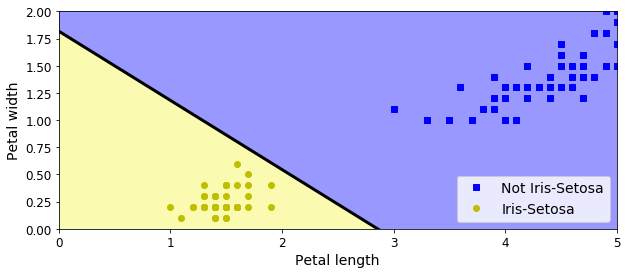

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

Del código anerior se puede observar que el algoritmo del percentron pareciese del Gradiente Descendiente Estocástico (Se puede utilizar en scikit-learn por medio de SGDClassifier con loss="perceptron").  Papert y Minsky en el 1969 expusieron un paper que marcaba las deficiencias del perceptron (no resolvian problemas triviales como XOR), lo cual llevó a cesar muchas investigaciones sobre esta área.

Pero, para suerte nuestra, realizar múltiples adiciones de perceptrones eliminan los problemas que poseen, es por esto que a las redes neuronales artificiales (ANN) se les llama Perceptrón Multi-Capas (MLP).

## Algoritmo de Propagación hacia atrás y MLPs

Las redes neuronales poseen más neuronas intermedias, recuerde que las de entrada se les llama capa de entrada, las de salida capa de salida, y a todas las demás que están en medio se les llama capas ocultas.

Mucho se intenton en entrenar estas redes MLP sin éxito hasta 1986 donde se introdujo el algoritmo de 'backpropagation' (que se conoce como gradiente descendiente / autodiff).  Lo que se hace es que se computa la salida de cada neurona propagando hacia adelante los resultados (forward pass).  Luego se mide el error de la red (actual - deseado) y se computa cuanto contribuyó con el error de cada neurona previa.  Luego se va hacia atrás obsevando cuanto contribuyó en el error de cada capa de la neurona propagando el gradiente de error entre cada neurona.

Resumen del párrafo anterior:
- Propagamos hacia adelante
- Medimos el error
- Vamos hacia atrás en cada capa midiendo el error
- Actualizamos los valores de pesos que hacen que este error se reduzca

Para que funcione mejor se reeplazó por la regresión logística: $\sigma(z) = \frac{1}{1+e^{-z}}$.  Se reemplazó por sigmoide pues era una función flat que no describia bien un gradiente.  El algoritmo de propagación puede ser utilizado con otras funciones de activación como $tanh (z) = 2\sigma(2z) - 1$ y $ReLU = max(0,z)$.  
- Tanh.  Es una curva S como la regresión logistica pero los valores de salida son entre -1 y 1 en vez de 0 y 1 de regresion logistica (normaliza la salida a 0 tanh).
- ReLU no es diferenciable a z = 0 pero es fácil de computar, no tiene un máximo de salida.

# Funciones de Activación

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

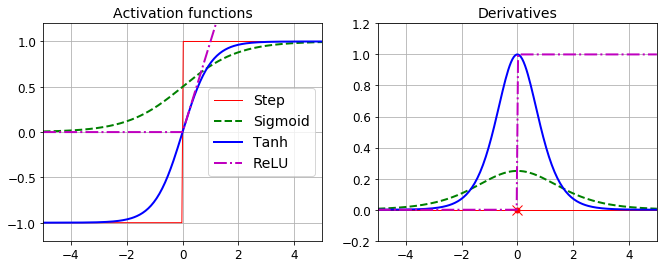

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

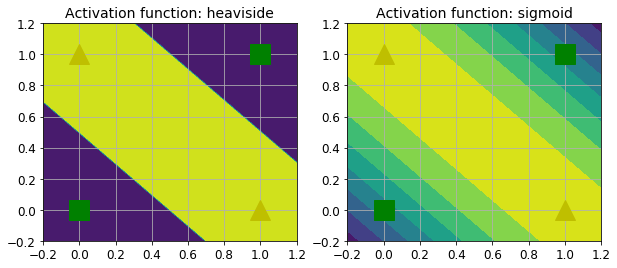

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

Solo para aclarar, las clasificaciones que se han visto donde solo es, por ejemplo, perros vs gatos se llama clasificación binaria donde existe una neurona de salida que se activa solo cuando la clase deseada es detectada.

Para clasificación multiclase la neurona de salida se modifica utilizando softmax que da la probabilidad de salida de una neurona correspondiente a la clase (esta parte sencilla es una feed-forward-neural-network).

# FNN (forward neural network) para MNIST

## Utilizando el API Estimator (conocido como `tf.contrib.learn`)

In [9]:
import tensorflow as tf

**Advertencia**: `tf.examples.tutorials.mnist` esta deprecado. Utilizaremos `tf.keras.datasets.mnist` en vez de. Mas alla, el API de `tf.contrib.learn` fue promovido a `tf.estimators` y `tf.feature_columns`, y ha cambiado considerablemente. En particular, no existe la función `infer_real_valued_columns_from_input()` o la clase `SKCompat`.

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [11]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\INGCOH~1\\AppData\\Local\\Temp\\tmp3w0qvhqs', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000001F116F8630>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions f

INFO:tensorflow:global_step/sec: 255.426
INFO:tensorflow:loss = 1.1257732, step = 4001 (0.393 sec)
INFO:tensorflow:global_step/sec: 240.963
INFO:tensorflow:loss = 3.408972, step = 4101 (0.417 sec)
INFO:tensorflow:global_step/sec: 254.054
INFO:tensorflow:loss = 1.0634453, step = 4201 (0.389 sec)
INFO:tensorflow:global_step/sec: 302.872
INFO:tensorflow:loss = 2.633352, step = 4301 (0.330 sec)
INFO:tensorflow:global_step/sec: 299.734
INFO:tensorflow:loss = 8.823604, step = 4401 (0.337 sec)
INFO:tensorflow:global_step/sec: 235.682
INFO:tensorflow:loss = 0.9572462, step = 4501 (0.423 sec)
INFO:tensorflow:global_step/sec: 271.26
INFO:tensorflow:loss = 1.3028083, step = 4601 (0.370 sec)
INFO:tensorflow:global_step/sec: 237.926
INFO:tensorflow:loss = 1.0008531, step = 4701 (0.419 sec)
INFO:tensorflow:global_step/sec: 254.598
INFO:tensorflow:loss = 0.12598573, step = 4801 (0.394 sec)
INFO:tensorflow:global_step/sec: 302.203
INFO:tensorflow:loss = 0.12471807, step = 4901 (0.344 sec)
INFO:tensorf

INFO:tensorflow:loss = 0.0404456, step = 12201 (0.335 sec)
INFO:tensorflow:global_step/sec: 302.077
INFO:tensorflow:loss = 0.27690592, step = 12301 (0.331 sec)
INFO:tensorflow:global_step/sec: 301.639
INFO:tensorflow:loss = 0.611657, step = 12401 (0.316 sec)
INFO:tensorflow:global_step/sec: 300.523
INFO:tensorflow:loss = 0.045526333, step = 12501 (0.333 sec)
INFO:tensorflow:global_step/sec: 300.431
INFO:tensorflow:loss = 0.1753497, step = 12601 (0.333 sec)
INFO:tensorflow:global_step/sec: 298.809
INFO:tensorflow:loss = 0.14092763, step = 12701 (0.335 sec)
INFO:tensorflow:global_step/sec: 315.921
INFO:tensorflow:loss = 0.04740358, step = 12801 (0.317 sec)
INFO:tensorflow:global_step/sec: 299.335
INFO:tensorflow:loss = 2.012114, step = 12901 (0.334 sec)
INFO:tensorflow:global_step/sec: 300.615
INFO:tensorflow:loss = 0.337372, step = 13001 (0.333 sec)
INFO:tensorflow:global_step/sec: 314.977
INFO:tensorflow:loss = 0.30022585, step = 13101 (0.333 sec)
INFO:tensorflow:global_step/sec: 298.0

INFO:tensorflow:global_step/sec: 299.728
INFO:tensorflow:loss = 0.15184723, step = 20401 (0.349 sec)
INFO:tensorflow:global_step/sec: 298.03
INFO:tensorflow:loss = 0.0737908, step = 20501 (0.320 sec)
INFO:tensorflow:global_step/sec: 295.656
INFO:tensorflow:loss = 0.061873302, step = 20601 (0.340 sec)
INFO:tensorflow:global_step/sec: 287.152
INFO:tensorflow:loss = 0.03198918, step = 20701 (0.348 sec)
INFO:tensorflow:global_step/sec: 269.526
INFO:tensorflow:loss = 0.1194368, step = 20801 (0.369 sec)
INFO:tensorflow:global_step/sec: 256.545
INFO:tensorflow:loss = 0.116532095, step = 20901 (0.393 sec)
INFO:tensorflow:global_step/sec: 267.798
INFO:tensorflow:loss = 0.049750537, step = 21001 (0.372 sec)
INFO:tensorflow:global_step/sec: 316.839
INFO:tensorflow:loss = 0.17621884, step = 21101 (0.314 sec)
INFO:tensorflow:global_step/sec: 267.92
INFO:tensorflow:loss = 0.1135357, step = 21201 (0.373 sec)
INFO:tensorflow:global_step/sec: 256.684
INFO:tensorflow:loss = 0.033047233, step = 21301 (0.

INFO:tensorflow:global_step/sec: 299.29
INFO:tensorflow:loss = 0.014846372, step = 28501 (0.334 sec)
INFO:tensorflow:global_step/sec: 299.836
INFO:tensorflow:loss = 0.021035608, step = 28601 (0.334 sec)
INFO:tensorflow:global_step/sec: 316.543
INFO:tensorflow:loss = 0.017177507, step = 28701 (0.332 sec)
INFO:tensorflow:global_step/sec: 300.999
INFO:tensorflow:loss = 0.04924614, step = 28801 (0.317 sec)
INFO:tensorflow:global_step/sec: 314.402
INFO:tensorflow:loss = 0.011144365, step = 28901 (0.335 sec)
INFO:tensorflow:global_step/sec: 301.162
INFO:tensorflow:loss = 0.002635802, step = 29001 (0.315 sec)
INFO:tensorflow:global_step/sec: 300.22
INFO:tensorflow:loss = 0.08885024, step = 29101 (0.333 sec)
INFO:tensorflow:global_step/sec: 315.201
INFO:tensorflow:loss = 0.06802161, step = 29201 (0.317 sec)
INFO:tensorflow:global_step/sec: 300.658
INFO:tensorflow:loss = 0.09654141, step = 29301 (0.333 sec)
INFO:tensorflow:global_step/sec: 299.488
INFO:tensorflow:loss = 0.0043556914, step = 294

INFO:tensorflow:global_step/sec: 232.007
INFO:tensorflow:loss = 0.09971182, step = 36601 (0.431 sec)
INFO:tensorflow:global_step/sec: 240.896
INFO:tensorflow:loss = 0.0075834976, step = 36701 (0.415 sec)
INFO:tensorflow:global_step/sec: 231.417
INFO:tensorflow:loss = 0.015678937, step = 36801 (0.432 sec)
INFO:tensorflow:global_step/sec: 240.312
INFO:tensorflow:loss = 0.0317295, step = 36901 (0.432 sec)
INFO:tensorflow:global_step/sec: 229.639
INFO:tensorflow:loss = 0.0011175403, step = 37001 (0.420 sec)
INFO:tensorflow:global_step/sec: 240.581
INFO:tensorflow:loss = 0.015805537, step = 37101 (0.431 sec)
INFO:tensorflow:global_step/sec: 230.092
INFO:tensorflow:loss = 0.025956614, step = 37201 (0.419 sec)
INFO:tensorflow:global_step/sec: 239.806
INFO:tensorflow:loss = 0.031188615, step = 37301 (0.417 sec)
INFO:tensorflow:global_step/sec: 224.139
INFO:tensorflow:loss = 0.018739955, step = 37401 (0.446 sec)
INFO:tensorflow:global_step/sec: 239.913
INFO:tensorflow:loss = 0.019045457, step =

Del codigo anterior podemos rescatar que utilizando TF.Learn podemos cargar código compatible con scikit-learn.  Utilizamos la clase DNNClassificer para entrenar una red neuronal que es lo bastante flexible como para especificar la profunidad de las capas ocultas de la red y tambien usa la función de softmax.

Si se observa tenemos con dos redes de 300 y 100 capas ocultas, finalmente la pasamos por la red de softmax para establecer las salidas.  Utilizamos batches en divisiones de 50 y 4000 iteraciones para training.

Pruebe con scikit-learn y observará que tiene un desempeño menor si utiliza machine learning vs redes neuronales.  Esta clase DNNClassifier utiliza la función ReLU por defecto, pero puede adecuarse para utilizar otra.

In [12]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-22T19:41:14Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\INGCOH~1\AppData\Local\Temp\tmp3w0qvhqs\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-22-19:41:16
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9795, average_loss = 0.10201099, global_step = 44000, loss = 12.912783
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\INGCOH~1\AppData\Local\Temp\tmp3w0qvhqs\model.ckpt-44000


In [13]:
eval_results

{'accuracy': 0.9795,
 'average_loss': 0.10201099,
 'loss': 12.912783,
 'global_step': 44000}

In [14]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\INGCOH~1\AppData\Local\Temp\tmp3w0qvhqs\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([ -4.9743533,   2.1254919,  -1.7874405,   9.817636 ,  -8.433875 ,
         -6.0676327, -16.283043 ,  22.256636 ,  -7.429538 ,   4.98635  ],
       dtype=float32),
 'probabilities': array([1.4918661e-12, 1.8078139e-09, 3.6123379e-11, 3.9610395e-06,
        4.6911493e-14, 4.9994801e-13, 1.8299015e-17, 9.9999607e-01,
        1.2807294e-13, 3.1594258e-08], dtype=float32),
 'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
       dtype=object)}

## Usando solamente TensorFlow

Es mejor utilizar Tensorflow debido a que se tiene más control de la red neuronal.

In [15]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

Primero construimos la red neuronal especificando las características de entrada, capas ocultas, y capa de salida.

In [16]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

Luego las características están divididas en un tensor de 28x28 características de forma pero djamos indefinido el primer parámetro para que entrene con cualquier cantidad de instancias; lo mismo para el tensor de salida sabemos cuantas (no sabemos que o cuanto será el batch, es mejor siempre dejarlo en None).

In [17]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

En el código anterior creamos la definición de una neurona (z = activation(w.T*x + b)).

- El código anterior muestra creación de alcances (scopes) para que se pueda 'depurar' e interpretar más fácil la gráfica.
- Buscamos la cantidad de neuronas de entrada con 'get_shape'
- Creamos una variable que guarda los pesos W.  'truncate_normal' la inicializa utilizando distribución gausiana y permite al algoritmo aprender.
- Creamos las variables a y b de bias inicializadas en 0
- Finalmente la implementación del vector Z = w.T*X + b, en donde z es un arreglo de vector.
- Finalmente utilizamos una función de activación ReLU o ninguna si no es especificada.

In [18]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

Ahora que creamos nuestra definición de neurona creamos las capas ocultas y los logits (los logits si observa con detenimiento es la neurona de salida, para clasificación binaria será 1 sola salida, para multiclase más de 1).

Observe como se crea la red neuronal:
- La primera red oculta toma las características X como entrada
- La segunda capa oculta toma el resutlado de la primera como entrada
- La última capa toma el resultado de la segunda capa oculta como entrada.

In [19]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

Ahora definiremos las funciones de costo (softmax en este caso), para el caso de softmax, recordando, esta penaliza el modelo si estima bajas probabilidades para las clases detectadas.  Recuerde también que los logits se dan entre la neurona de salida y la función softmax, el rango es un valor entre 0 y n_clases - 1; finalmente reducimos las esta función de pérdida con la función reduce_mean.

In [20]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

Con el modelo ahora definimos una función de optimización para minimizar la función de costo.

In [21]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

Para evaluar el modelo utilizamos la metrica de 'accuracy'.

Se compara verificando la salida actual de los datos de training vs los datos de ground truth (datos y del dataset, usando in_top_k).  El resultado es una tabla binaria de valores correctos e incorrectos, para medir entonces transformamos estos boolanos a enteros de punto flotante y luego realizamos la media.

In [22]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

El código anterior muestra como inicializar variables y un 'handler' para salvar el modelo.

In [23]:
n_epochs = 40
batch_size = 50

In [24]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [25]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9146
1 Batch accuracy: 0.92 Val accuracy: 0.936
2 Batch accuracy: 0.96 Val accuracy: 0.945
3 Batch accuracy: 0.92 Val accuracy: 0.9514
4 Batch accuracy: 0.98 Val accuracy: 0.956
5 Batch accuracy: 0.96 Val accuracy: 0.9568
6 Batch accuracy: 1.0 Val accuracy: 0.9614
7 Batch accuracy: 0.94 Val accuracy: 0.963
8 Batch accuracy: 0.98 Val accuracy: 0.9648
9 Batch accuracy: 0.96 Val accuracy: 0.966
10 Batch accuracy: 0.92 Val accuracy: 0.9686
11 Batch accuracy: 0.98 Val accuracy: 0.969
12 Batch accuracy: 0.98 Val accuracy: 0.967
13 Batch accuracy: 0.98 Val accuracy: 0.9706
14 Batch accuracy: 1.0 Val accuracy: 0.9712
15 Batch accuracy: 0.94 Val accuracy: 0.973
16 Batch accuracy: 1.0 Val accuracy: 0.9734
17 Batch accuracy: 1.0 Val accuracy: 0.974
18 Batch accuracy: 1.0 Val accuracy: 0.9744
19 Batch accuracy: 0.98 Val accuracy: 0.9746
20 Batch accuracy: 1.0 Val accuracy: 0.9754
21 Batch accuracy: 1.0 Val accuracy: 0.9754
22 Batch accuracy: 0.98 Val accuracy:

El codigo anterior muestra como cargar el dataset, abre una sesión de tensorflow e inicializa las variables.

Luego utilizamos el lazo primcipal que pasa por todos los mini-batch del training set.  Cada mini-batch es ingresado a la red neuronal por la función next_batch() y finalmente evalua el modelo.  Esta secuencia es repetida hasta que termina la cantidad de epochs a ejecutarse.

Finalmente salvamos el modelo.

In [26]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [27]:
print("Clases predecidas:", y_pred)
print("Clases actuales:   ", y_test[:20])

Clases predecidas: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
Clases actuales:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Cargamos el modelo y ejecutamos unas predicciones para saber la efectividad.

# Visualizando la gráfica...
### Dentro de Jupyter Notebooks


Snipet de código inferior del gist de [Arthur Douillard](https://gist.github.com/arthurdouillard/621ed889291df51f80ef33059d882c53) nos permite utilizar Tensorboard dentro de jupyter notebook.

In [28]:
import tensorflow as tf
import numpy as np
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = tf.compat.as_bytes("<stripped %d bytes>"%size)
    return strip_def
  
def rename_nodes(graph_def, rename_func):
    res_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = res_def.node.add() 
        n.MergeFrom(n0)
        n.name = rename_func(n.name)
        for i, s in enumerate(n.input):
            n.input[i] = rename_func(s) if s[0]!='^' else '^'+rename_func(s[1:])
    return res_def
  
def show_graph(graph_def, max_const_size=32, width=800, height=600):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:{height}px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()), height=str(height))
  
    iframe = """
        <iframe seamless style="width:{width}px;height:{height}px;border:0" srcdoc="{code}"></iframe>
    """.format(code=code.replace('"', '&quot;'), width=width, height=str(height + 20))
    display(HTML(iframe))

In [29]:
show_graph(tf.get_default_graph())

## Utilizando `dense()` en vez `neuron_layer()`

Nota: Es mejor utilizar `tf.layers.dense()`. 

`dense()` es parecida a `fully_connected()` con las siguientes diferencias:
* se renombran los parámetros: `scope` a `name`, `activation_fn` a `activation` (y un sufico `_fn` que es removido de otros parámetros como `normalizer_fn`), `weights_initializer` ahora son `kernel_initializer`, etc.
* La activación por defecto `activation` ahora es `None` en vez de `tf.nn.relu`.

In [30]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [31]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [32]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [33]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [34]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [35]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [36]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [37]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9028
1 Batch accuracy: 0.92 Validation accuracy: 0.9252
2 Batch accuracy: 0.94 Validation accuracy: 0.9372
3 Batch accuracy: 0.9 Validation accuracy: 0.942
4 Batch accuracy: 0.94 Validation accuracy: 0.9472
5 Batch accuracy: 0.94 Validation accuracy: 0.9512
6 Batch accuracy: 1.0 Validation accuracy: 0.9552
7 Batch accuracy: 0.94 Validation accuracy: 0.961
8 Batch accuracy: 0.96 Validation accuracy: 0.962
9 Batch accuracy: 0.94 Validation accuracy: 0.965
10 Batch accuracy: 0.92 Validation accuracy: 0.9654
11 Batch accuracy: 0.98 Validation accuracy: 0.9668
12 Batch accuracy: 0.98 Validation accuracy: 0.9684
13 Batch accuracy: 0.98 Validation accuracy: 0.9702
14 Batch accuracy: 1.0 Validation accuracy: 0.9696
15 Batch accuracy: 0.94 Validation accuracy: 0.9716
16 Batch accuracy: 0.98 Validation accuracy: 0.9726
17 Batch accuracy: 1.0 Validation accuracy: 0.9728
18 Batch accuracy: 0.98 Validation accuracy: 0.975
19 Batch accuracy: 0.98 Validati

In [38]:
show_graph(tf.get_default_graph())

# Para terminar, Hiperparámetros, ¿Cómo ajustarlos?

Una situación dificil es ajustar los hiperparámetros de la red.  Vemos que tenemos diferentes hiperparámetros con los cuales podemos afinar la red:
- neuronas por capa
- funciones de activación
- funciones de costo
- learning rate
- inicialización de la red
- etc.

Del primer laboratorio recordamos utilizar GridSearch, pero a este paso, por la cantidad de hiperparámetros tomaría mucho tiempo realizar esto.  Un Randomized Search sería mejor y también hay otras herramientas como Oscar para realizar implementación de hiperparámetros rápido.

Nota: Existen otras herramientas que quizá puedan ayudar como AutoML y Keras Tuner para Tensorflow 1.x y 2.0 que pueden ayudar.


### Ajustando El Número de Capas Ocultas

A veces una sola capa oculta da buenos resulados.  Si aún no está conforme puede probar con una red neuronal un poco más amplia pues una red neuronal más profunda generaliza mejor los resultados, además que son más fáciles de entrenar.

- Las capas más bajas de la red tienen niveles de estructuras como por ejemplo formas y orientaciones
- Capas intermedias podrían combinar formas más complejas como círculos, cuadrados
- Capas mucho más altas combinan todas estas estructuras para formar algo más complejo, por ejemplo un auto.

La arquitectura jerárquica hace que las redes neuronales converjan rápidamente. Existe una manera de acelerar entrenamiento, por ejemplo utilizando Transfer Learning, esta técnica se basa en modelos ya pre-entrenados que aprendieron características anteriores, por ejemplo, digamos que tenemos un dataset de perros y gatos y el modelo generaliza bien a nuevos conjuntos de perros y gatos, si queremos reconocier una nueva clase, podemos agregar un nuevo dataset, crear una clase adicional y ayudarnos con las características anteriores aprendidas.

La recomendación sería esta, no empezar a entrenar de cero para conseguir buenos resultados.

### Número de Neuronas de las Capas Ocultas

Las capas de características son determinadas por la matriz de entrada (p.e., en MNIST 784 entradas de 28x28) y la salida por 10 clases (0...9).  Una práctica común es minimizar el tamaño de la capas a medida que se avanza por la red neuronal, esto es debido a que características muy primitivas (líneas y puntos, p.e.) se pueden encontrar.

Del ejemplo anterior observamos que se puede especificar los niveles de capas intermedias pero esta técnica no es común y ahora se estila a ubicar el mismo nivel en todas las capas ocultas, p.e. para el ejemplo anterior con 300 y 100, todas serían 300 o 100, hablando de un número.

Realizarías entrenamiento de esto hasta que caigas en overfitting, a parte, solamente sería un hiperparámetro que ajustar.

Preferiblemente se debe incrementar el número de capas más que el número de neuronas por capa, tiene un mejro resultado.  Encontrar este número es alggo difícil simplemente lo que se debe hacer es tomar un modelo y entrenar, para luego realizar un early stop antes de caer en overfitting.

### Funciones de Activación

La mayoría de las veces la función de ReLU en las capas ocultas da buenos resultados; además de ser rápida y facil de computar y el gradiente descendiente no se queda alojada en el mínimo local (plateaux), no se satura por medio de los valores de entrada largos como la regresión logística o la función tangente hiperbólica, que se satura a 1.

Para la red de salida softmax (la función de activación) es una buena opción para tareas de clasificación.  Para regresión preferiblemente es mejor no utilizar funciones de activación en las salidas.

# Laboratorio

Clasificación de Imágenes - 'Horse vs Humans':  Clasifique este dataset intentando conseguir arriba del 98% de precisión
- Carge el dataset de [Horse vs Humans](https://www.tensorflow.org/datasets/catalog/horses_or_humans) - 10%
- Defina y utilice una grafica de función de su agrado (sigmoid, tanh, relu) (esta función ya está implementada en tensorflow) - 10%
- Imprima 10 caballos y 10 humanos - 10%
- Divida el dataset en 70/30 - 10%
- Entrene y prediga cual es caballo o humano - 10%
- Guarde el checkpoint usando Saver - 10%
- Restaure el checkpoint - 10%
- Añada la función summary para visualizar la gráfica en tensorboard -10%
- Trate de modificar algunos hiperparámetros para mejorar el training - 20%